In [73]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer

In [2]:

# On place low memory to false

df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep = "\t", low_memory = False)
df


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

# Nous vérifions les pays présents dans notre colonne 'countries_fr'

df["countries_fr"].unique()


array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

In [4]:

# Nous écrivont un code nous permettant de filter les chaines de caractères contenant les différentes abréviations pour la france 

def pays (df, cle =['FR', 'Fr', 'fR', 'fr']):
    list_pays = [i for i in df['countries'].value_counts().index.values
                 if any(lettre in i for lettre in cle)]
    a = df[df['countries_fr'].isin(list_pays)]
    return a


In [5]:

# Nous affichons les résultats dans un nouveau dataframe

df2 = pays(df)
df2


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

# Nous vérifions le résultat du filtre

df2['countries_fr'].unique()


array(['France', 'France,États-Unis', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Australie,France',
       'France,La Réunion', 'France,Allemagne', 'Belgique,France',
       'France,Suisse', 'Polynésie française', 'France,Suisse,États-Unis',
       'France,Italie', 'Canada,France', 'Belgique,Canada,France,Suisse',
       'France,Saint-Pierre-et-Miquelon', 'France,Suisse,Royaume-Uni',
       'Belgique,France,Royaume-Uni', 'Canada,France,États-Unis',
       'France,Pays-Bas', 'France,Pays-Bas,Royaume-Uni', 'Algérie,France',
       'France,Guyane', 'Belgique,France,Pays-Bas', 'France,Tunisie',
       'Belgique,France,Suisse', 'France,Japon',
       'Chili,France,Espagne,Suisse,Royaume-Uni',
       'Belgique,France,États-Unis', 'Danemark,France,Royaume-Uni',
       'France,Sénégal', 'France,Luxembourg',
       'Belgique,France,Allemagne,Suisse', 'France,Allemagne,Espagne',
       'France,Espagne', 'France,Allemagne,Roumanie,Royaume-Uni,Scotland',
       'France,A

In [7]:
valeurs_manquantes_col = df2.isnull().sum(axis=0)
valeurs_manquantes_col

code                           0
url                            0
creator                        0
created_t                      0
created_datetime               1
                           ...  
carbon-footprint_100g      98085
nutrition-score-fr_100g    36995
nutrition-score-uk_100g    36995
glycemic-index_100g        98261
water-hardness_100g        98261
Length: 162, dtype: int64

In [8]:

# On calcule le taux de remplissage des colonnes

taux_de_remplissage_cols = ((1-(valeurs_manquantes_col / df2.shape[0])) * 100)
taux_de_remplissage_cols


code                       100.000000
url                        100.000000
creator                    100.000000
created_t                  100.000000
created_datetime            99.998982
                              ...    
carbon-footprint_100g        0.179115
nutrition-score-fr_100g     62.350271
nutrition-score-uk_100g     62.350271
glycemic-index_100g          0.000000
water-hardness_100g          0.000000
Length: 162, dtype: float64

In [9]:

# On affiche le pourcentage de remplissage par colonnes

taux_de_remplissage_cols[0:60]


code                                          100.000000
url                                           100.000000
creator                                       100.000000
created_t                                     100.000000
created_datetime                               99.998982
last_modified_t                               100.000000
last_modified_datetime                        100.000000
product_name                                   92.658328
generic_name                                   38.814993
quantity                                       72.289108
packaging                                      59.815186
packaging_tags                                 59.815186
brands                                         87.743866
brands_tags                                    87.739795
categories                                     62.848943
categories_tags                                62.848943
categories_fr                                  62.848943
origins                        

In [10]:

# Taux de remplissage par colonnes

taux_de_remplissage_cols[60:120]


main_category_fr                    62.848943
image_url                           53.284620
image_small_url                     53.284620
energy_100g                         65.580444
energy-from-fat_100g                 0.028496
fat_100g                            48.329449
saturated-fat_100g                  63.324208
butyric-acid_100g                    0.000000
caproic-acid_100g                    0.000000
caprylic-acid_100g                   0.000000
capric-acid_100g                     0.000000
lauric-acid_100g                     0.001018
myristic-acid_100g                   0.000000
palmitic-acid_100g                   0.000000
stearic-acid_100g                    0.000000
arachidic-acid_100g                  0.001018
behenic-acid_100g                    0.000000
lignoceric-acid_100g                 0.000000
cerotic-acid_100g                    0.000000
montanic-acid_100g                   0.001018
melissic-acid_100g                   0.000000
monounsaturated-fat_100g          

In [11]:
# Taux de remplissage par colonnes

taux_de_remplissage_cols[120:180]


beta-carotene_100g                   0.011195
vitamin-d_100g                       0.597389
vitamin-e_100g                       0.801946
vitamin-k_100g                       0.073274
vitamin-c_100g                       1.308759
vitamin-b1_100g                      0.869114
vitamin-b2_100g                      0.648273
vitamin-pp_100g                      0.715442
vitamin-b6_100g                      0.754114
vitamin-b9_100g                      0.696105
folates_100g                         0.002035
vitamin-b12_100g                     0.558716
biotin_100g                          0.194380
pantothenic-acid_100g                0.429468
silica_100g                          0.029513
bicarbonate_100g                     0.053938
potassium_100g                       0.338893
chloride_100g                        0.117035
calcium_100g                         2.271501
phosphorus_100g                      0.569911
iron_100g                            1.195795
magnesium_100g                    

# 
### Taux de remplissage

In [12]:
# On affiche les features avec les taux de remplissage > à 50 %
# On gardera tout de même les fibres qui sont nécéssaires pour notre analyse

taux_de_remplissage_cols[taux_de_remplissage_cols > 50]


code                                       100.000000
url                                        100.000000
creator                                    100.000000
created_t                                  100.000000
created_datetime                            99.998982
last_modified_t                            100.000000
last_modified_datetime                     100.000000
product_name                                92.658328
quantity                                    72.289108
packaging                                   59.815186
packaging_tags                              59.815186
brands                                      87.743866
brands_tags                                 87.739795
categories                                  62.848943
categories_tags                             62.848943
categories_fr                               62.848943
countries                                  100.000000
countries_tags                             100.000000
countries_fr                

# 

# 

### 
### Choix des Features
### 

#### Filtrage Initial

In [13]:

# Nous voulons garder uniquement les colonnes qui nous intéressent

# On supprime les colonnes allant de 'creator' à 'last_modified_datetime'

df3 = df2.drop(df2.iloc[:, 2:7], axis=1)
df3


,code,url,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,Bouteille en verre,bouteille-en-verre,Roussette du Bugey,roussette-du-bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,thé bio équitable,50 g,"boîte,carton","boite,carton",Lobodis,lobodis,thés verts,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,NaN,180 g,"Pot,Verre","pot,verre","Sans marque,D.Lambert","sans-marque,d-lambert","Viandes,Produits à tartiner,Charcuteries,Produ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

# On supprime la colonne 'generic_name'

df4 = df3.drop(df3.iloc[:, 3:4], axis=1)
df4


,code,url,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,Bouteille en verre,bouteille-en-verre,Roussette du Bugey,roussette-du-bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...","en:beverages,en:alcoholic-beverages,en:wines,e...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,"boîte,carton","boite,carton",Lobodis,lobodis,thés verts,"en:plant-based-foods-and-beverages,en:beverage...",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,"Pot,Verre","pot,verre","Sans marque,D.Lambert","sans-marque,d-lambert","Viandes,Produits à tartiner,Charcuteries,Produ...","en:meats,en:spreads,en:prepared-meats,en:salte...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

# On supprime les colonnes allant de 'packaging' à 'countries_tags'

df5 = df4.drop(df4.iloc[:, 4:27], axis = 1)
df5


,code,url,product_name,quantity,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis","Milk chocolate coating (evaporated cane juice,...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,NaN,NaN,NaN,Anhydride sulfureux et sulfites,en:sulphur-dioxide-and-sulphites,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,"thé vert, arôme naturel bergamote avec autres ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,"viande d'oie, graisse de canard, épices, sel, ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

# On supprime les colonnes allant de 'ingredients_text' à 'nutrition_grade_uk'

df6 = df5.drop(df5.iloc[:, 5:25], axis = 1)
df6


,code,url,product_name,quantity,countries_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,NaN,Alcoholic beverages,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Fish Meat Eggs,Processed meat,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:

# On supprime la colonne 'pnns_groups_1' 

df7 = df6.drop(df6.iloc[:, 5:6], axis = 1)
df7


,code,url,product_name,quantity,countries_fr,pnns_groups_2,states,states_tags,states_fr,main_category,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:green-teas,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:salted-spreads,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

# On supprime les colonnes 'states' à 'main_category'

df8 = df7.drop(df7.iloc[:, 6:10], axis = 1)
df8


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,image_url,image_small_url,energy_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,1883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,http://fr.openfoodfacts.org/images/products/99...,http://fr.openfoodfacts.org/images/products/99...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,http://fr.openfoodfacts.org/images/products/99...,http://fr.openfoodfacts.org/images/products/99...,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,http://fr.openfoodfacts.org/images/products/99...,http://fr.openfoodfacts.org/images/products/99...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,http://fr.openfoodfacts.org/images/products/99...,http://fr.openfoodfacts.org/images/products/99...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

# On supprime les colonnes 'image_url' à 'main_category'

df9 = df8.drop(df8.iloc[:, 7:9], axis = 1)
df9


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,NaN,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:

# On supprime les colonnes 'energy-from-fat_100g' à 'fat_100g'

df10 = df9.drop(df9.iloc[:, 8:10], axis = 1)
df10


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,butyric-acid_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

# On supprime les colonnes 'butyric-acid_100g' à 'carbohydrates_100g'

df11 = df10.drop(df10.iloc[:, 9:44], axis = 1)
df11


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:

# On supprime les colonnes 'butyric-acid_100g' à 'carbohydrates_100g'

df12 = df11.drop(df11.iloc[:, 10:18], axis = 1)
df12


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

# On supprime les colonnes 'casein_100g' à 'nucleotides_100g'

df13 = df12.drop(df12.iloc[:, 12:15], axis = 1)
df13


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:

# On supprime les colonnes 'sodium_100g' à 'carbon-footprint_100g'

df14 = df13.drop(df13.iloc[:, 13:54], axis = 1)
df14


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,2.5,2.5,0.09652,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.5,0.02540,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:

# On supprime les colonnes 'nutrition-score-uk_100g' à 'water-hardness_100g'

df15 = df14.drop(df14.iloc[:, 14:17], axis = 1)
df15


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,2.5,2.5,0.09652,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.5,0.02540,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 
#### Vérification des doublons

In [26]:

df15.duplicated().sum()


0

In [27]:

df16 = df15.drop_duplicates(['code'], 'first')
df16


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,2.5,2.5,0.09652,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.5,0.02540,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 
# 

#### 
## Traitement des valeurs aberrantes

### Les variables quantitatives

In [28]:

df16.describe()


,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,6.444000e+04,62223.000000,62364.000000,45629.000000,64166.000000,62420.000000,61266.000000
mean,1.171017e+03,5.421350,13.414862,2.556618,7.754298,1.161506,8.674599
std,1.285107e+04,8.533714,19.081442,4.633231,7.886179,4.314492,9.041236
min,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,4.270000e+02,0.300000,1.000000,0.000000,1.800000,0.080000,1.000000
50%,1.034000e+03,2.000000,4.000000,1.330000,6.000000,0.558800,9.000000
75%,1.648000e+03,7.400000,17.700000,3.200000,11.000000,1.244600,15.000000
max,3.251373e+06,210.000000,105.000000,178.000000,100.000000,211.000000,40.000000


#### 
#### saturated-fat_100g -> Les graisses saturées

In [29]:

df17 = df16.loc[-(df16['saturated-fat_100g'] > 100)]
df17


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,2.5,2.5,0.09652,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.5,0.02540,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

df17['saturated-fat_100g'].describe()


count    62222.000000
mean         5.418062
std          8.494280
min          0.000000
25%          0.300000
50%          2.000000
75%          7.400000
max        100.000000
Name: saturated-fat_100g, dtype: float64

In [31]:
df17.shape

(98260, 14)

# 

####
#### L'énergie (kcal)

In [32]:

# La valeur maximale fixée se situe environ entre 1000 et 2000 kcal pour 100g d'aliments
# Le maximum d'énergie est pour certaines huiles qui peuvent contenir jusqu'a 1000 kcal pour 100g de produit


In [33]:

df17['energy_100g'].describe()


count    6.443900e+04
mean     1.170745e+03
std      1.285099e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.034000e+03
75%      1.648000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [34]:

# Nous filtrons ici certaines valeurs aberrantes (critère métier)

df18 = df17.loc[-((df17['energy_100g'] == 3.251373e+06)|(df17['energy_100g'] == 182764.000000)|(df17['energy_100g'] == 69292.000000)|(df17['energy_100g'] == 15481.000000))]
df18

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,NaN,"France,États-Unis",unknown,NaN,1883.0,12.5,57.5,2.5,2.5,0.09652,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.5,0.02540,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df18.describe()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,64435.000000,62218.000000,62359.000000,45624.000000,64161.000000,62415.000000,61261.000000
mean,1116.205441,5.418246,13.415277,2.556409,7.754474,1.161430,8.674246
std,787.592405,8.494482,19.082010,4.633060,7.886085,4.314534,9.040899
min,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,427.000000,0.300000,1.000000,0.000000,1.800000,0.080000,1.000000
50%,1033.000000,2.000000,4.000000,1.330000,6.000000,0.558800,9.000000
75%,1648.000000,7.400000,17.700000,3.200000,11.000000,1.244600,15.000000
max,9983.000000,100.000000,105.000000,178.000000,100.000000,211.000000,40.000000


In [36]:
# (energy_100g à 75%)-(energy_100g à 25%) * 1.5 = (1648-427)*1.5 = 1831 kcal

In [37]:
# Energie pour 100 g d'aliment (en prenant en compte les glucides, les lipides et les protéines
# qui correspondent aux substrats énergétiques)

df19 = df18.loc[-(df18['energy_100g'] > 1831)]
df19


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,NaN,NaN,6.2,6.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.50,0.0254,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:

df19['energy_100g'].describe()


count    51864.000000
mean       829.357174
std        539.793272
min          0.000000
25%        338.000000
50%        752.000000
75%       1347.000000
max       1831.000000
Name: energy_100g, dtype: float64

In [39]:
df19.shape

(85685, 14)

# 

#### 
#### Les sucres

In [40]:

df19['sugars_100g'].describe()


count    50067.000000
mean        11.109430
std         18.231297
min         -0.100000
25%          1.000000
50%          3.400000
75%         12.000000
max        105.000000
Name: sugars_100g, dtype: float64

In [41]:

# Nous filtrons ici les valeurs négatives ainsi que les valeurs supérieures à 100g

df20 = df19.loc[-((df19['sugars_100g']<0)|(df19['sugars_100g']>100))]
df20

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,NaN,NaN,6.2,6.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.50,0.0254,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df20['sugars_100g'].describe()

count    50062.000000
mean        11.102286
std         18.213489
min          0.000000
25%          1.000000
50%          3.400000
75%         12.000000
max        100.000000
Name: sugars_100g, dtype: float64

In [43]:
df20.shape

(85680, 14)

# 

#### 
#### Les protéines

In [44]:

df20['proteins_100g'].describe()


count    51643.000000
mean         7.740554
std          8.208643
min          0.000000
25%          1.400000
50%          5.400000
75%         11.500000
max        100.000000
Name: proteins_100g, dtype: float64

# 

#### 
#### Le sel

In [45]:

df20['salt_100g'].describe()


count    50117.000000
mean         1.233231
std          4.728986
min          0.000000
25%          0.070000
50%          0.600000
75%          1.270000
max        211.000000
Name: salt_100g, dtype: float64

In [46]:

# Nous filtrons ici les valeurs supérieurs à 100

df21 = df20.loc[-(df20['salt_100g'] > 100)]
df21


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,NaN,NaN,6.2,6.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.50,0.0254,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:

df21['salt_100g'].describe()


count    50115.000000
mean         1.226576
std          4.602222
min          0.000000
25%          0.070000
50%          0.600000
75%          1.270000
max        100.000000
Name: salt_100g, dtype: float64

In [48]:
df21.shape

(85678, 14)

# 

#### 
#### Le nutriscore   'nutrition-score-fr_100g '

In [49]:

# Pour le score de valeurs nutritionnelles, les notations vont de -15 à 40, respectivement nutriments de bonne qualité qui
# gagnent des points négatifs et de mauvaise qualité, qui gagnent des points positifs (densité énergétique, sucres, acides
# gras saturés et sel)


In [50]:

df21['nutrition-score-fr_100g'].describe()


count    49065.000000
mean         6.238337
std          7.895769
min        -15.000000
25%          0.000000
50%          4.000000
75%         13.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64

# 

#### 
#### La quantité   'quantity'

In [51]:

df21['quantity'].describe()


count     61660
unique     8866
top       500 g
freq       3008
Name: quantity, dtype: object

#  
# 

##  
### Les variables catégorielles
#### 

#### 
####  Le nom produit (product_name)

In [52]:

# Nous filtrons ici tout les produits n'ayant pas de nom

df22 = df21[df21['product_name'].notnull()]
df22


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,NaN,NaN,6.2,6.25,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.2,0.50,0.0254,2.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 
#### L'indice pnns_groups_2

In [53]:

df22['pnns_groups_2'].unique()


array([nan, 'unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products', 'Cheese',
       'Sandwich', 'Appetizers', 'Dressings and sauces', 'Sweets',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Alcoholic beverages', 'Cereals',
       'Vegetables', 'Bread', 'Processed meat', 'Nuts', 'vegetables',
       'Ice cream', 'Fish and seafood', 'pastries', 'Milk and yogurt',
       'Dairy desserts', 'Dried fruits', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

### 
#### 

### 
## Visualisation des valeurs manquantes et corrélation par rapport au valeurs manquantes
### 

In [54]:

df22.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78550 entries, 0 to 320770
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     78550 non-null  object 
 1   url                      78550 non-null  object 
 2   product_name             78550 non-null  object 
 3   quantity                 61277 non-null  object 
 4   countries_fr             78550 non-null  object 
 5   pnns_groups_2            55889 non-null  object 
 6   main_category_fr         52314 non-null  object 
 7   energy_100g              51573 non-null  float64
 8   saturated-fat_100g       49596 non-null  float64
 9   sugars_100g              49783 non-null  float64
 10  fiber_100g               36373 non-null  float64
 11  proteins_100g            51356 non-null  float64
 12  salt_100g                49838 non-null  float64
 13  nutrition-score-fr_100g  48803 non-null  float64
dtypes: float64(7), object

In [55]:

df22.isna().sum()


code                           0
url                            0
product_name                   0
quantity                   17273
countries_fr                   0
pnns_groups_2              22661
main_category_fr           26236
energy_100g                26977
saturated-fat_100g         28954
sugars_100g                28767
fiber_100g                 42177
proteins_100g              27194
salt_100g                  28712
nutrition-score-fr_100g    29747
dtype: int64

<AxesSubplot:>

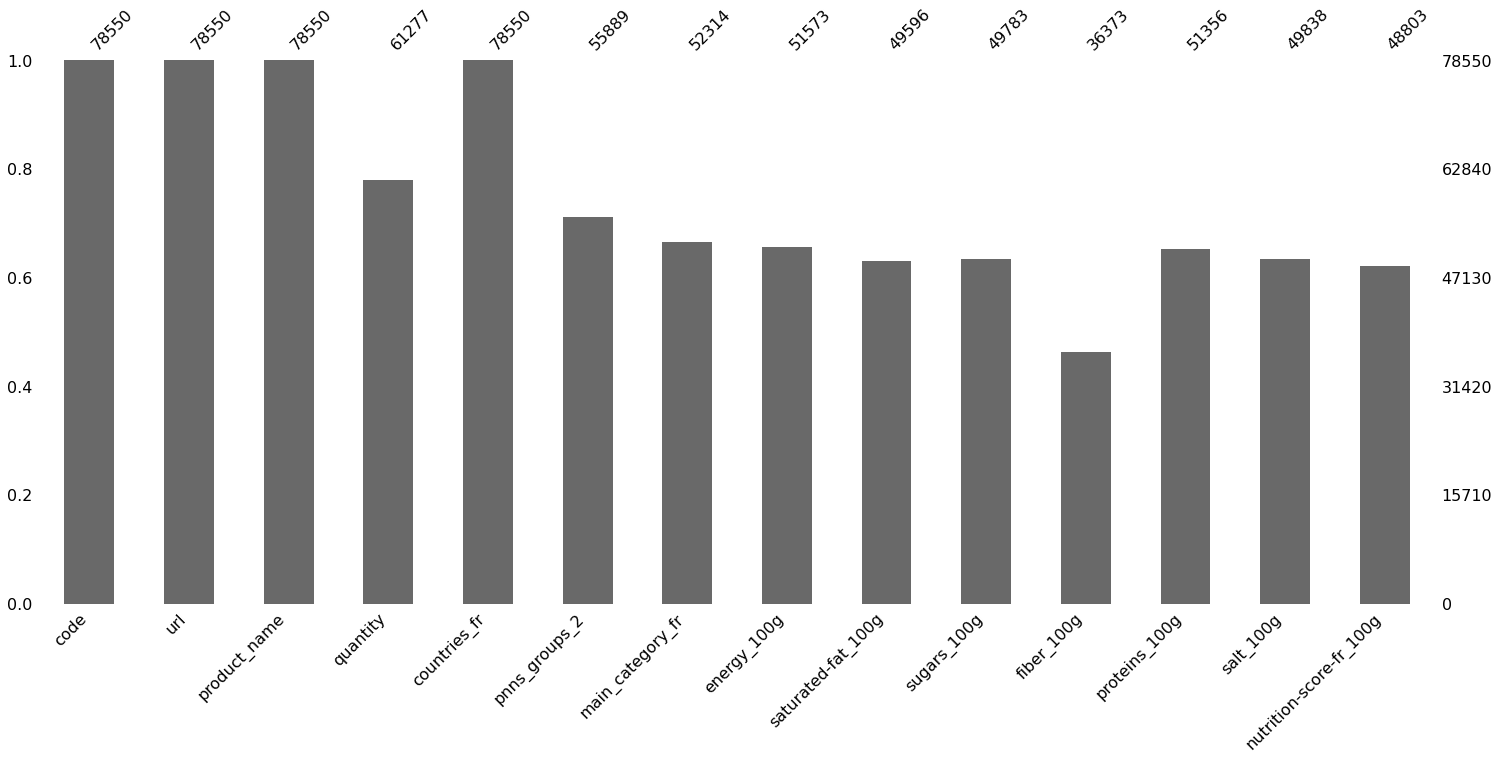

In [56]:

# Visualisation des valeurs présente sous forme de barres 

msno.bar(df22)


<AxesSubplot:>

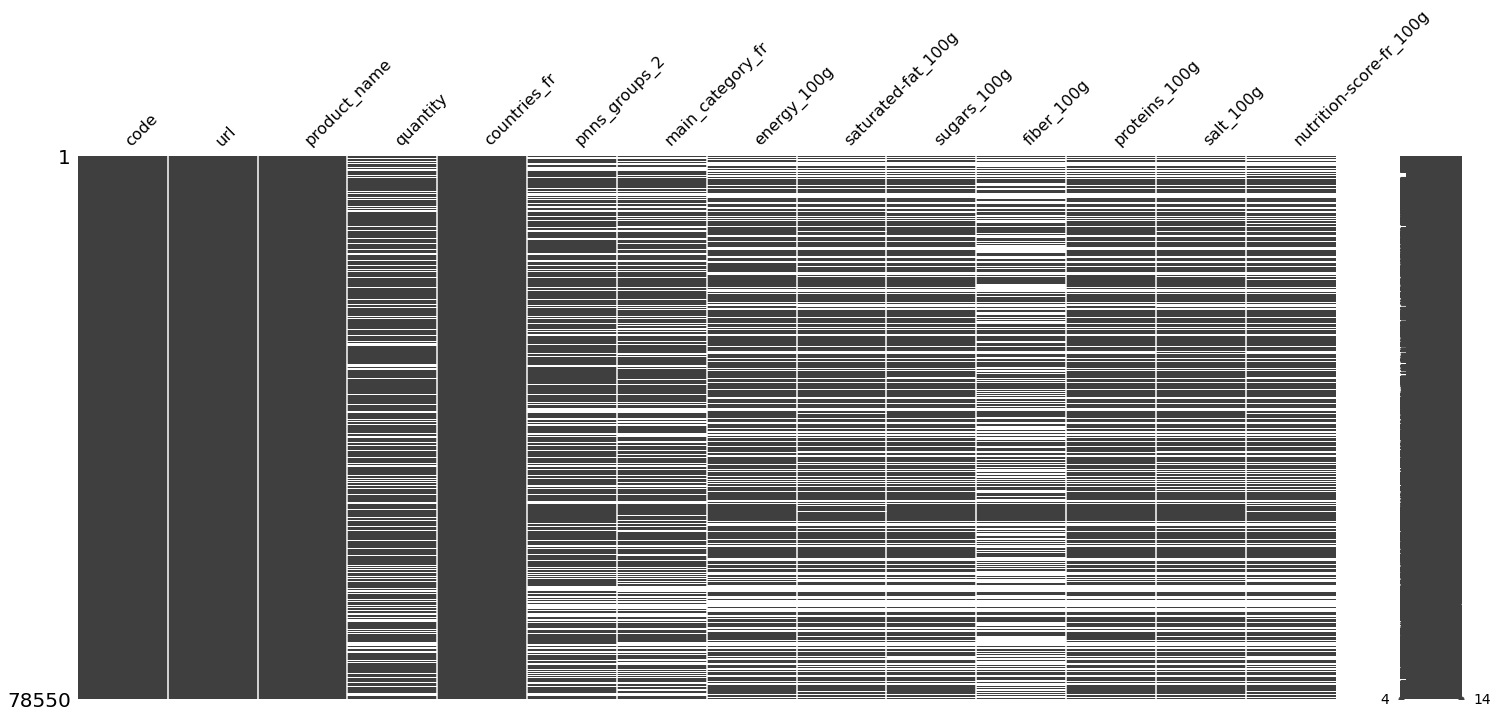

In [57]:

# Visualisation des valeurs manquantes et présente sous forme de matrice

msno.matrix(df22)


<AxesSubplot:>

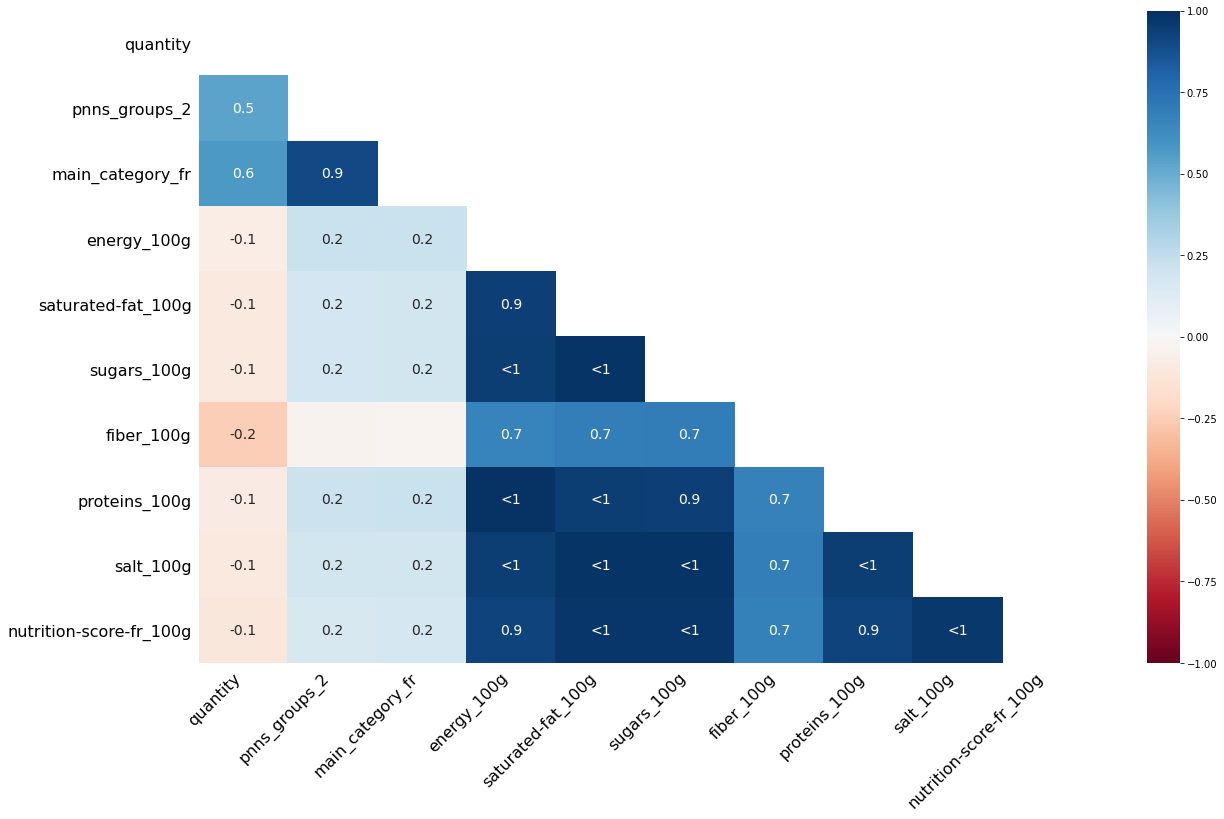

In [58]:

# Corrélation entre les features par rapport aux NaN

msno.heatmap(df22)


<AxesSubplot:>

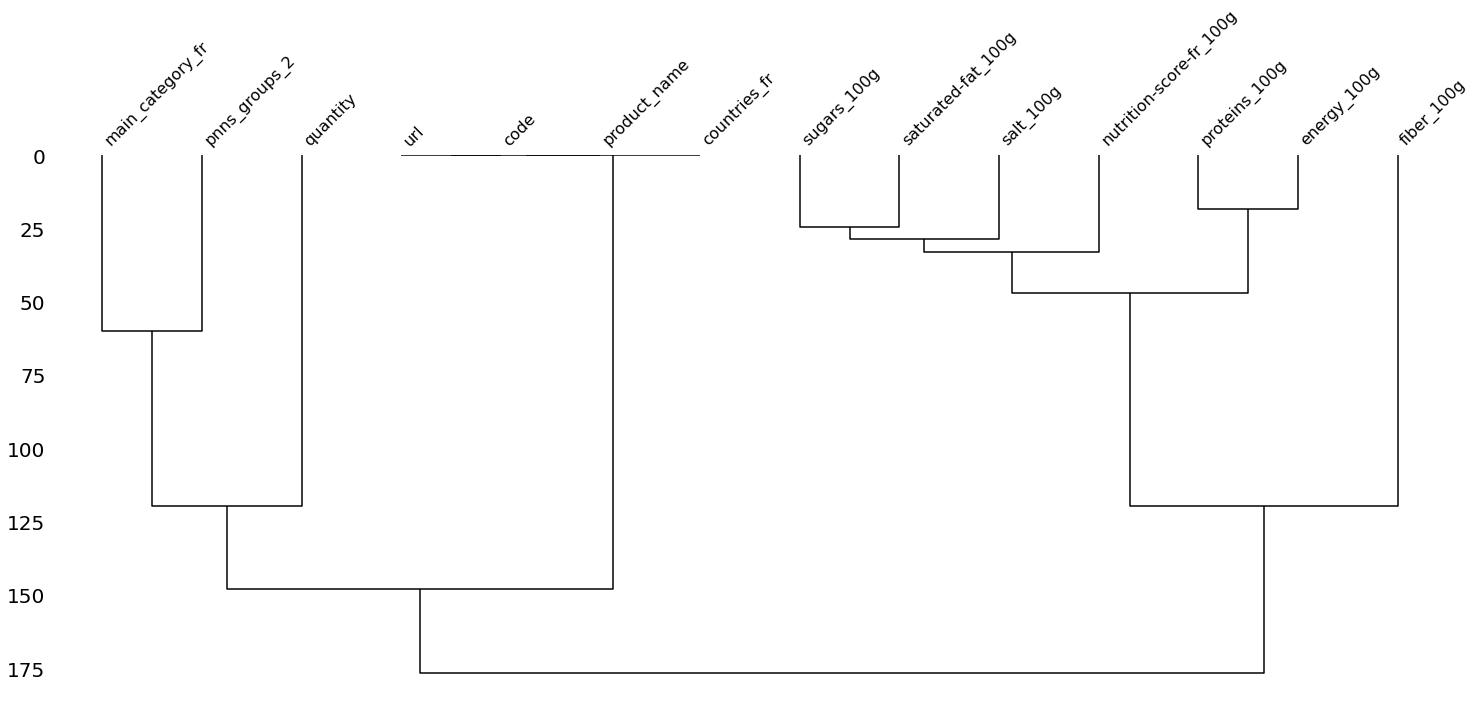

In [59]:

# Regroupemt hiérarchique des variables corrélées par rapport aux valeurs manquantes (plus les regroupement sont séparés
# moins il y a de corrélation par rapport aux valeurs manquantes)
# On voit ici deux groupe distinct, le premier groupe a un taux plus élevé de valeurs manquantes que le deuxième


msno.dendrogram(df22)


#  
# 
# Gestion des valeurs manquantes et Inputation des variables

# 
## Variables catégorielles
#### 



### La variable Main_category_fr

In [60]:

# Information sur main_catégories_fr

# Nous n'effectuons pas d'opération sur cette colonnes nous la gardons cette colonne à titre d'information

df22['main_category_fr'].describe()

count        52314
unique        1436
top       Boissons
freq          4275
Name: main_category_fr, dtype: object

In [61]:
a = df22['main_category_fr'].value_counts()
b = a.index
tableau = pd.DataFrame(b, columns = ['main_category_fr'])

# On définit et on calcule nos deux colonnes
tableau['n'] = a.values
tableau['frequence'] = tableau['n'] / len(df22)

# On trie nos valeurs par ordre alphabétique
tableau = tableau.sort_values('main_category_fr')

# On cumule la somme des fréquences 
tableau['Frequence_cumulee'] = tableau['frequence'].cumsum()
tableau

,main_category_fr,n,frequence,Frequence_cumulee
713,A-code-1,1,0.000013,0.000013
1035,Ab,1,0.000013,0.000025
661,Abats-surgeles,1,0.000013,0.000038
1145,Abdijbier,1,0.000013,0.000051
280,Accras-de-morue,2,0.000025,0.000076
...,...,...,...,...
415,ru:Confectionaries,1,0.000013,0.664367
239,ru:Сухарики,3,0.000038,0.664405
1151,vi:Gia-vị,1,0.000013,0.664418
693,zh:Sauce-de-soja,1,0.000013,0.664430


In [62]:

# Pour Afficher les différentes catégories

# df22['main_category_fr'].unique().tolist()


# 
# 
### Le pnns_groups_2

<AxesSubplot:>

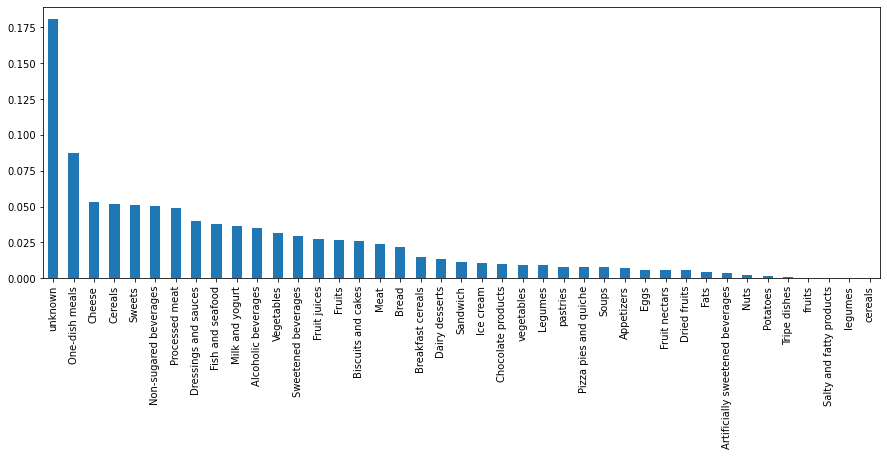

In [63]:

# Distribution du pnns_groups_2

plt.figure(figsize=(15,5))
df22['pnns_groups_2'].value_counts(normalize=True).plot(kind='bar')



# 
# 
## Variables Quantitatives
#### 


### energy_100g    ->    L'énergie pour 100g

In [64]:
df22['energy_100g'].describe()

count    51573.000000
mean       829.537556
std        539.662830
min          0.000000
25%        338.000000
50%        753.000000
75%       1347.000000
max       1831.000000
Name: energy_100g, dtype: float64

<AxesSubplot:xlabel='energy_100g'>

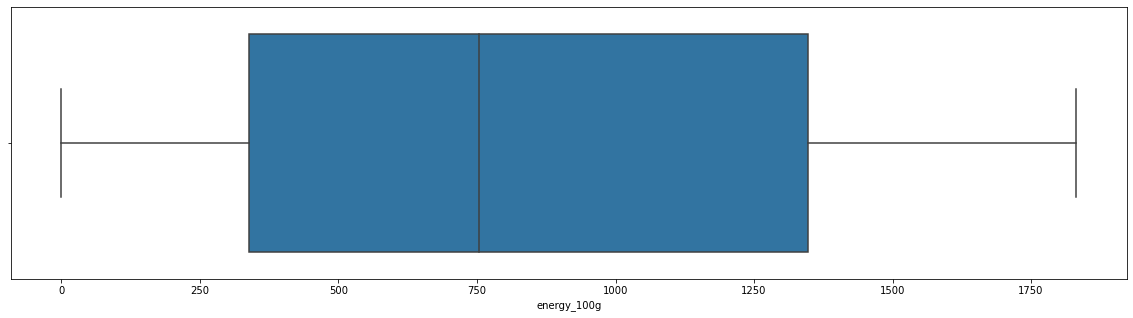

In [65]:

# Distribution de l'énergie pour 100g

plt.figure(figsize = (20, 5))
sns.boxplot(x = df22['energy_100g'])


# 
#### Hypothèse ou on remplace les NaN par la mediane

In [66]:
mediane_energy = df22['energy_100g'].fillna(df22['energy_100g'].median(skipna = True))
mediane_energy

0          753.0
46         753.0
136        753.0
138       1481.0
182        753.0
           ...  
320761     753.0
320763      21.0
320764     753.0
320765     753.0
320770     753.0
Name: energy_100g, Length: 78550, dtype: float64

<AxesSubplot:xlabel='energy_100g'>

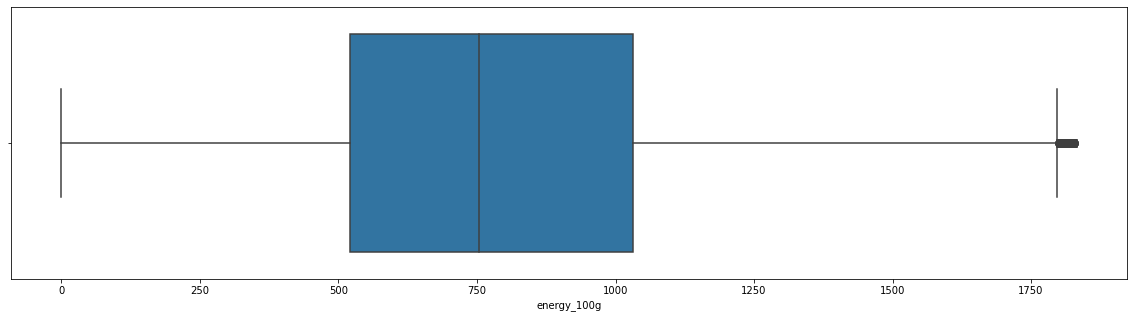

In [67]:

# On trace un box plot après imputation par la mediane 

plt.figure(figsize = (20, 5))
sns.boxplot(x = mediane_energy)


In [68]:
mediane_energy.describe()

count    78550.000000
mean       803.251704
std        438.787336
min          0.000000
25%        521.000000
50%        753.000000
75%       1031.000000
max       1831.000000
Name: energy_100g, dtype: float64

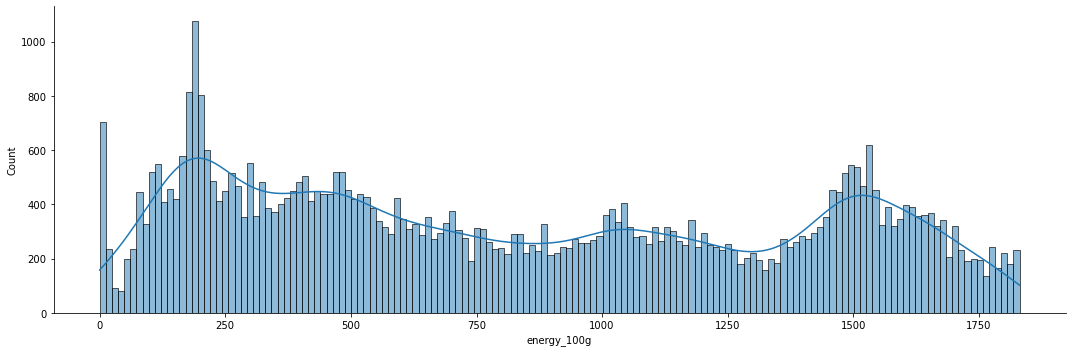

In [69]:
sns.displot(x = 'energy_100g', data = df22, kde = True, aspect = 3, bins=150)

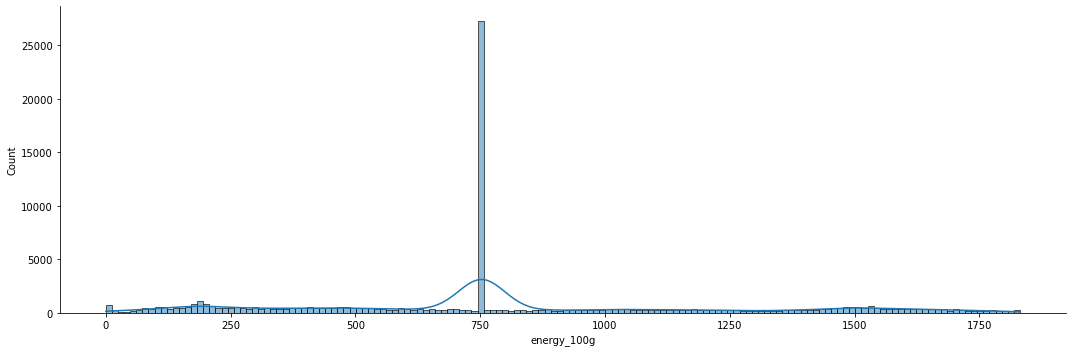

In [70]:
sns.displot(x = mediane_energy, data = df22, kde = True, aspect = 3, bins=150)

# 
#
### On utilise le knn Imputer


In [71]:
knnI = KNNImputer(n_neighbors = 4)

In [74]:

kn = make_column_transformer((knnI, ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
                                     'nutrition-score-fr_100g']), remainder='passthrough')


In [75]:

a = kn.fit_transform(df22)


In [76]:
a

array([[829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        nan, nan, nan],
       [829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        'unknown', 'Filet-de-boeuf', nan],
       [829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        'unknown', nan, nan],
       ...,
       [829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        nan, nan, nan],
       [829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        'Processed meat', 'Produits à tartiner salés', nan],
       [829.5375558722586, 3.3255350739979033, 11.104777516019524, ...,
        nan, nan, nan]], dtype=object)

In [77]:
df23 = pd.DataFrame(a, columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr', 'fiber_100g'])
df23

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,fiber_100g
0,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,NaN
1,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,NaN
2,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,NaN
3,1481.0,1.5075,21.4075,6.25,1.66,8.75,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,6.2
4,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,NaN
78546,21.0,0.2,0.5,0.5,0.0254,2.0,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,0.2
78547,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,NaN
78548,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,NaN


In [78]:


df24 = df23[[ 'code', 'url', 'product_name', 'quantity', 'countries_fr', 'pnns_groups_2', 'main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g', 'fiber_100g']]
df24


,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,1.5075,21.4075,6.25,1.66,8.75,6.2
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.5,0.0254,2.0,0.2
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,NaN


# 
# 
### fiber_100g    ->    Les fibres pour 100g

In [79]:
df24['fiber_100g'] = df24['fiber_100g'].replace(np.nan,0)

In [80]:
df24['fiber_100g'].describe()

count    78550.000000
mean         1.048851
std          3.294339
min          0.000000
25%          0.000000
50%          0.000000
75%          0.900000
max        100.000000
Name: fiber_100g, dtype: float64

In [81]:
df24['fiber_100g'].isna().sum()

0

In [82]:
df24

,code,url,product_name,quantity,countries_fr,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,fiber_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,1kg,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,2.46 kg,France,unknown,Filet-de-boeuf,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
2,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,NaN,France,unknown,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
3,0000000039529,http://world-fr.openfoodfacts.org/produit/0000...,Pack de 2 Twix,NaN,"France,États-Unis",unknown,NaN,1481.0,1.5075,21.4075,6.25,1.66,8.75,6.2
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,lentilles vertes,1 kg,France,Legumes,Aliments et boissons à base de végétaux,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78545,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,Roussette du Bugey (2011),750 ml,France,Alcoholic beverages,Boissons,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
78546,99111250,http://world-fr.openfoodfacts.org/produit/9911...,Thé vert Earl grey,50 g,France,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.5,0.0254,2.0,0.2
78547,9918,http://world-fr.openfoodfacts.org/produit/9918...,"Cheese cake thé vert, yuzu",NaN,France,NaN,NaN,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
78548,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,Rillette d'oie,180 g,France,Processed meat,Produits à tartiner salés,829.537556,3.325535,11.104778,7.749905,1.225636,6.238776,0.0
